In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

def img_change_chanels(img):
    return cv2.merge(cv2.split(img)[::-1])

def show(img,title = None):
    plt.imshow(img)
    plt.title(title) if title is not None else None
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
def show_sub(images,x,y):
    for i in range(len(images)):
        plt.subplot(x,y,i+1)
        plt.imshow(images[i])
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
# 灰度图显示
def gray_show(img,name = None):
    if name is not None:
        cv2.imshow(name,img)
    else:
        cv2.imshow("img",img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [2]:
img = cv2.imread("./images/luokuoTest.1.png")
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [3]:
gray_show(image)

In [4]:
# 二值化处理

In [5]:
ret,bin_img = cv2.threshold(image,127,255,cv2.THRESH_BINARY_INV)
gray_show(bin_img)

In [6]:
# 得到轮廓
# findContours(img,mode,method)

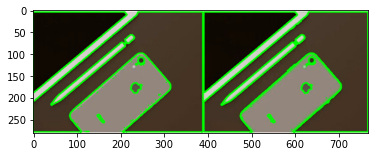

In [7]:
contours , h= cv2.findContours(bin_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
# 绘制轮廓
# drawContours(img,contours,具体哪个轮廓,color,粗细)
image_copy = img.copy()
my_img = cv2.drawContours(image_copy,contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
show(my_img)

In [8]:
np.array(contours).shape # 画出79个轮廓

<ipython-input-8-5dae1fce6438>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(contours).shape # 画出79个轮廓


(75,)

In [9]:
h.shape

(1, 75, 4)

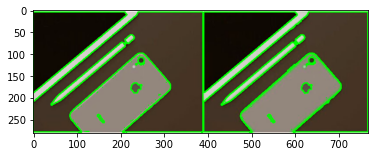

In [10]:
contours_ , _= cv2.findContours(bin_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE) # 近似轮廓，底层就是二分法
image_copy_ = img.copy()
my_img_ = cv2.drawContours(image_copy_,contours_,-1, (0, 255, 0), 2)
show(my_img_)

In [11]:
# 外接矩形
print(len(contours))
cnt = contours[73]

x,y,w,h = cv2.boundingRect(cnt)

75


In [12]:
# 绘制矩形
img_copy = img.copy()
img_copy_ = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),1)
gray_show(img_copy_)